# LIBRARY

In [170]:
pip install imblearn


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


# DATA IMPORTING 

In [201]:
df = pd.read_csv('parkinson_disease.csv')

In [202]:
pd.set_option('display.max_columns', 10)
df.head(5)

,id,gender,PPE,DFA,RPDE,...,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,...,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,...,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,...,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,...,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,...,11.6891,8.2103,5.0559,6.1164,1


In [203]:
df.shape

(756, 755)

# DATA EXPLORATION AND CLEANING

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,756.0,125.500000,72.793721,0.000000,62.750000,125.500000,188.250000,251.00000
gender,756.0,0.515873,0.500079,0.000000,0.000000,1.000000,1.000000,1.00000
PPE,756.0,0.746284,0.169294,0.041551,0.762833,0.809655,0.834315,0.90766
DFA,756.0,0.700414,0.069718,0.543500,0.647053,0.700525,0.754985,0.85264
RPDE,756.0,0.489058,0.137442,0.154300,0.386537,0.484355,0.586515,0.87123
...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,756.0,12.375335,16.341665,1.628700,3.114375,4.741450,12.201325,73.53220
tqwt_kurtosisValue_dec_34,756.0,14.799230,15.722502,1.861700,3.665925,6.725700,21.922050,62.00730
tqwt_kurtosisValue_dec_35,756.0,14.751559,14.432979,1.955900,3.741275,7.334250,22.495175,57.54430
tqwt_kurtosisValue_dec_36,756.0,31.481110,34.230991,2.364000,3.948750,10.637250,61.125325,156.42370


In [206]:
df.isnull().sum().sum()

0

# Handling Class Imbalance and Splitting Data

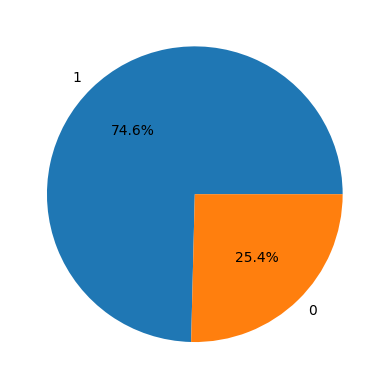

In [36]:
x = df['class'].value_counts()
plt.pie(x.values,
		labels = x.index,
		autopct='%1.1f%%')
plt.show()

In [32]:
features = df.drop('class', axis=1)
target = df['class']


X_train, X_val, y_train, y_val = train_test_split(features, target,
                                                  test_size=0.2,
                                                  random_state=42)

#ros = RandomOverSampler(sampling_strategy=1.0, random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#X_resampled.shape, y_resampled.value_counts()

## we can apply smote also 


In [38]:
 #Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled= smote.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.value_counts()

((900, 92),
 class
 1    450
 0    450
 Name: count, dtype: int64)

In [1]:
import pandas as pd
from collections import defaultdict

# -----------------------------
# STEP 1: Load dataset
# -----------------------------
df = pd.read_csv("parkinson_disease.csv")
all_features = df.columns.tolist()

# -----------------------------
# STEP 2: Define main groups
# -----------------------------
group_keywords = {
    "Demographics": ["id", "gender"],
    "Traditional Voice Measures": ["PPE", "DFA", "RPDE", "Jitter", "Shimmer", "Intensity"],
    "Glottal & Harmonicity Features": ["Harmonicity", "GQ_", "meanAutoCorr", "meanNoiseToHarm", "meanHarmToNoise"],
    "Formants & Bandwidths": ["f1", "f2", "f3", "f4", "b1", "b2", "b3", "b4"],
    "MFCC & Log Energy Features": ["MFCC", "log_energy", "delta", "delta_delta"],
    "GNE Features": ["GNE_"],
    "VFER / IMF Features": ["VFER_", "IMF_"],
    "Wavelet Energy & Entropy": ["tqwt_energy", "tqwt_entropy", "tqwt_TKEO", "tqwt_meanValue", "tqwt_medianValue", "tqwt_stdValue", "tqwt_minValue", "tqwt_maxValue", "tqwt_skewnessValue", "tqwt_kurtosisValue"],
    "Deterministic / Approximate Entropy": ["det_", "app_", "Ed_", "Ed2_"],
    "Higher-Order Energy Features": ["Ea", "Ea2"],
    "Misc / Other": []  # fallback
}

# Assign main group to each feature
def assign_group(feature_name):
    for group, keywords in group_keywords.items():
        for kw in keywords:
            if kw in feature_name:
                return group
    return "Misc / Other"

grouped_df = pd.DataFrame([
    {"feature": feat, "group": assign_group(feat)}
    for feat in all_features
])

In [2]:
print("\n Main Feature Group Summary:")
print(grouped_df["group"].value_counts())


 Main Feature Group Summary:
group
Wavelet Energy & Entropy               432
Deterministic / Approximate Entropy    180
MFCC & Log Energy Features              82
Traditional Voice Measures              17
VFER / IMF Features                     13
Formants & Bandwidths                    8
Misc / Other                             7
Glottal & Harmonicity Features           6
GNE Features                             6
Demographics                             2
Higher-Order Energy Features             2
Name: count, dtype: int64


In [3]:
# -----------------------------
# STEP 3: Define TQWT subgroups
# -----------------------------
tqwt_subgroups = {
    "TQWT_Energy": "tqwt_energy_dec_",
    "TQWT_Entropy_Shannon": "tqwt_entropy_shannon_dec_",
    "TQWT_Entropy_Log": "tqwt_entropy_log_dec_",
    "TQWT_TKEO_Mean": "tqwt_TKEO_mean_dec_",
    "TQWT_TKEO_Std": "tqwt_TKEO_std_dec_",
    "TQWT_Stat_Mean": "tqwt_meanValue_dec_",
    "TQWT_Stat_Median": "tqwt_medianValue_dec_",
    "TQWT_Stat_Std": "tqwt_stdValue_dec_",
    "TQWT_Stat_Min": "tqwt_minValue_dec_",
    "TQWT_Stat_Max": "tqwt_maxValue_dec_",
    "TQWT_Stat_Skewness": "tqwt_skewnessValue_dec_",
    "TQWT_Stat_Kurtosis": "tqwt_kurtosisValue_dec_"
}

# -----------------------------
# STEP 4: Define Det/App subgroups (including LT variants)
# -----------------------------
det_app_subgroups = {
    # Approximate (normal + LT)
    "App_TKEO_Mean": ["app_TKEO_mean_", "app_det_TKEO_mean_", "app_LT_TKEO_mean_"],
    "App_TKEO_Std": ["app_TKEO_std_", "app_LT_TKEO_std_"],
    "App_Entropy_Shannon": ["app_entropy_shannon_", "app_LT_entropy_shannon_"],
    "App_Entropy_Log": ["app_entropy_log_", "app_LT_entropy_log_"],

    # Deterministic (normal + LT)
    "Det_TKEO_Mean": ["det_TKEO_mean_", "det_LT_TKEO_mean_"],
    "Det_TKEO_Std": ["det_TKEO_std_", "det_LT_TKEO_std_"],
    "Det_Entropy_Shannon": ["det_entropy_shannon_", "det_LT_entropy_shannon_"],
    "Det_Entropy_Log": ["det_entropy_log_", "det_LT_entropy_log_"],

    # Energy
    "Ed_Coef": ["Ed_"],
    "Ed2_Coef": ["Ed2_"]
}

import re

mfcc_subgroups = {
    "MFCC_Mean": lambda f: f.startswith("mean_MFCC_"),
    "MFCC_Std": lambda f: f.startswith("std_MFCC_"),
    
    "Log_Energy_Mean": lambda f: f in ["mean_Log_energy", "mean_delta_log_energy"],
    "Log_Energy_Std": lambda f: f in ["std_Log_energy", "std_delta_log_energy"],

    "MFCC_Delta_Mean": lambda f: re.match(r"^mean_.*_delta$", f) is not None,
    "MFCC_Delta_Std": lambda f: re.match(r"^std_.*_delta$", f) is not None,

    "MFCC_DeltaDelta_Mean": lambda f: re.match(r"^mean_.*_delta_delta", f) is not None,
    "MFCC_DeltaDelta_Std": lambda f: re.match(r"^std_.*_delta_delta", f) is not None
}

# Normalize all values to lists in case any are strings
for key in det_app_subgroups:
    if isinstance(det_app_subgroups[key], str):
        det_app_subgroups[key] = [det_app_subgroups[key]]

In [4]:
# -----------------------------
# STEP 5: Assign subgroups
# -----------------------------
def assign_subgroup(row):
    feat = row["feature"]
    group = row["group"]

    if group == "Wavelet Energy & Entropy":
        for name, key in tqwt_subgroups.items():
            if key in feat:
                return name

    elif group == "Deterministic / Approximate Entropy":
        # Prioritize app_ keys before det_ to avoid misclassification
        ordered_subgroups = list(det_app_subgroups.items())
        ordered_subgroups.sort(key=lambda x: 0 if any("app_" in k for k in x[1]) else 1)
        
        for name, patterns in ordered_subgroups:
            for pattern in patterns:
                if pattern in feat:
                    return name
                
    elif group == "MFCC & Log Energy Features":
        for name, check_fn in mfcc_subgroups.items():
            if check_fn(feat):
                return name

grouped_df["subgroup"] = grouped_df.apply(assign_subgroup, axis=1)

In [5]:
grouped_df["subgroup"] = grouped_df.apply(assign_subgroup, axis=1)

print("\n MFCC & Log Energy Subgroup Summary:")
print(grouped_df[grouped_df["group"] == "MFCC & Log Energy Features"]["subgroup"].value_counts())


 MFCC & Log Energy Subgroup Summary:
subgroup
MFCC_Delta_Mean    25
MFCC_Delta_Std     25
MFCC_Mean          13
MFCC_Std           13
Log_Energy_Mean     1
Log_Energy_Std      1
Name: count, dtype: int64


# Features reductions

In [6]:
# Step 6: Apply median aggregation per subgroup
df_reduced = df.copy()

# Ensure 'class' is always retained
protected_features = ["class"]

# Get all unique subgroups (excluding NaN)
subgroup_names = grouped_df["subgroup"].dropna().unique()

for subgroup in subgroup_names:
    # Features in this subgroup
    features = grouped_df[grouped_df["subgroup"] == subgroup]["feature"].tolist()
    
    # Exclude protected features (e.g., 'class')
    features_to_use = [f for f in features if f not in protected_features]

    # Skip subgroup if empty after exclusion
    if not features_to_use:
        continue

    # Create median feature
    df_reduced[f"{subgroup}_median"] = df[features_to_use].median(axis=1)

    # Drop the original subgroup features (excluding protected ones)
    df_reduced.drop(columns=features_to_use, inplace=True)

# Save the reduced dataset to CSV
#df_reduced.to_csv("parkinson_disease_reduced.csv", index=False)

# Print summary
print(f"Reduced dataset saved with shape: {df_reduced.shape}")
print(f"File: parkinson_disease_reduced.csv")

Reduced dataset saved with shape: (756, 93)
File: parkinson_disease_reduced.csv


# Feature selection on reduced features data

In [7]:
# Step 1: Separate Features and Target
X = df_reduced.drop(columns=["class"])
y = df_reduced["class"]
# Step 2: Standardize Features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)
print(feature_importance)

                        feature  importance
60   std_delta_delta_log_energy    0.062954
68        Log_Energy_Std_median    0.041330
10                 locAbsJitter    0.023332
59               std_Log_energy    0.023225
81  TQWT_Entropy_Shannon_median    0.020944
..                          ...         ...
62                           Ea    0.003944
70               Ed_Coef_median    0.003822
63                          Ea2    0.002419
71   Det_Entropy_Shannon_median    0.002078
1                        gender    0.000691

[92 rows x 2 columns]


In [10]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')  # Try 'all' or an integer like 10
X_new = selector.fit_transform(X_scaled, y)

# View feature scores
import pandas as pd
feature_scores = pd.DataFrame({
    "feature": X.columns,
    "score": selector.scores_
}).sort_values(by="score", ascending=False)
print(feature_scores)

                       feature      score
69       MFCC_Delta_Std_median  86.166099
60  std_delta_delta_log_energy  85.233907
3                          DFA  77.934889
26                          f1  73.683804
64            MFCC_Mean_median  72.033541
..                         ...        ...
29                          f4   0.154537
79             Ed2_Coef_median   0.135244
58        mean_delta_delta_0th   0.131771
70              Ed_Coef_median   0.038480
90   TQWT_Stat_Skewness_median   0.009301

[92 rows x 2 columns]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LassoCV
import numpy as np

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Get selected features
coef = lasso.coef_
selected_features = X.columns[coef != 0]
print("Selected Features by Lasso:", selected_features.tolist())

/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011488843692248452, tolerance: 0.008865838509316758
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01107474020744803, tolerance: 0.008865838509316758
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010951879077616411, tolerance: 0.008865838509316758
  model = cd_fast.enet_coordi

Selected Features by Lasso: ['id', 'DFA', 'locPctJitter', 'f2', 'b4', 'GNE_SNR_TKEO', 'GNE_SNR_SEO', 'GNE_NSR_SEO', 'VFER_entropy', 'IMF_SNR_SEO', 'IMF_NSR_TKEO', 'std_delta_delta_log_energy', 'MFCC_Mean_median', 'Log_Energy_Mean_median', 'MFCC_Delta_Std_median', 'App_Entropy_Shannon_median', 'App_TKEO_Std_median', 'TQWT_Energy_median', 'TQWT_Entropy_Shannon_median', 'TQWT_Entropy_Log_median', 'TQWT_Stat_Std_median']


In [14]:
# STEP 1: Prepare data
df = pd.read_csv("parkinson_disease_reduced.csv")
X = df.drop(columns=["class"])
y = df["class"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cols = X.columns


rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
rf_importance = pd.Series(rf.feature_importances_, index=X_cols).sort_values(ascending=False)

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_scaled, y)
anova_scores = pd.Series(selector.scores_, index=X_cols).sort_values(ascending=False)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)
lasso_coef = pd.Series(np.abs(lasso.coef_), index=X_cols).sort_values(ascending=False)

def get_top_k_features(series, k):
    return list(series.head(k).index)

top_k_values = [10, 20, 50]
feature_sets = {}

for k in top_k_values:
    feature_sets[f"top_{k}_rf"] = get_top_k_features(rf_importance, k)
    feature_sets[f"top_{k}_anova"] = get_top_k_features(anova_scores, k)
    feature_sets[f"top_{k}_lasso"] = get_top_k_features(lasso_coef, k)

# Optional: check intersection
for k in top_k_values:
    overlap = set(feature_sets[f"top_{k}_rf"]) & set(feature_sets[f"top_{k}_anova"]) & set(feature_sets[f"top_{k}_lasso"])
    print(f"\n Features selected by ALL 3 methods (top {k}): {len(overlap)}")
    print(sorted(list(overlap)))


/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012146864252102318, tolerance: 0.011721322314049633
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015053585765471666, tolerance: 0.011721322314049633
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018419528229443927, tolerance: 0.011721322314049633
  model = cd_fast.enet_coord


 Features selected by ALL 3 methods (top 10): 1
['std_delta_delta_log_energy']

 Features selected by ALL 3 methods (top 20): 5
['App_Entropy_Shannon_median', 'MFCC_Delta_Std_median', 'TQWT_Entropy_Shannon_median', 'f2', 'std_delta_delta_log_energy']

 Features selected by ALL 3 methods (top 50): 20
['App_Entropy_Log_median', 'App_Entropy_Shannon_median', 'App_TKEO_Mean_median', 'App_TKEO_Std_median', 'DFA', 'GNE_SNR_SEO', 'IMF_NSR_entropy', 'Log_Energy_Mean_median', 'Log_Energy_Std_median', 'MFCC_Delta_Std_median', 'MFCC_Mean_median', 'TQWT_Entropy_Log_median', 'TQWT_Entropy_Shannon_median', 'TQWT_Stat_Max_median', 'TQWT_Stat_Std_median', 'VFER_entropy', 'f2', 'locPctJitter', 'std_Log_energy', 'std_delta_delta_log_energy']


In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

def run_custom_eda(df, selected_features, class_column='class', show_pairplot=True):
    """
    Perform EDA on a custom set of selected features.

    Parameters:
    - df: DataFrame with full data including target class
    - selected_features: list of selected feature names
    - class_column: name of the target column (default = 'class')
    - show_pairplot: whether to show seaborn pairplot (default = True)
    """
    
    eda_df = df[selected_features + [class_column]]
    
    print(f"\n--- EDA on {len(selected_features)} Features Selected by All 3 Methods ---\n")
    
    # Class-wise mean comparison
    class_means = eda_df.groupby(class_column).mean().T
    class_means.plot(kind="bar", figsize=(15, 6))
    plt.title("Class-wise Mean Comparison (Top Features)")
    plt.ylabel("Mean Value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Boxplots
    for feature in selected_features:
        plt.figure(figsize=(6, 4))
        sb.boxplot(data=eda_df, x=class_column, y=feature)
        plt.title(f"Boxplot of {feature} by Class")
        plt.tight_layout()
        plt.show()

    # Optional: Pairplot for top 5 features
    if show_pairplot and len(selected_features) >= 5:
        sb.pairplot(eda_df[selected_features[:5] + [class_column]], hue=class_column)
        plt.suptitle("Pairplot of Top 5 Features", y=1.02)
        plt.show()



--- EDA on 20 Features Selected by All 3 Methods ---



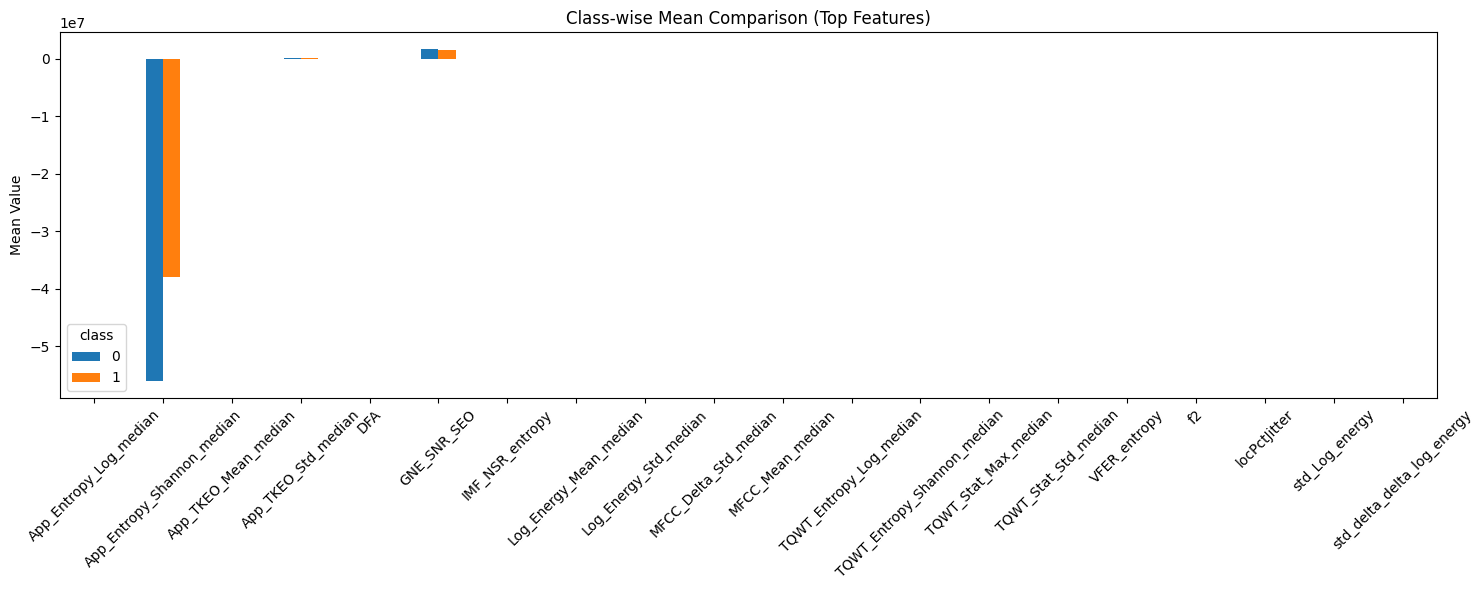

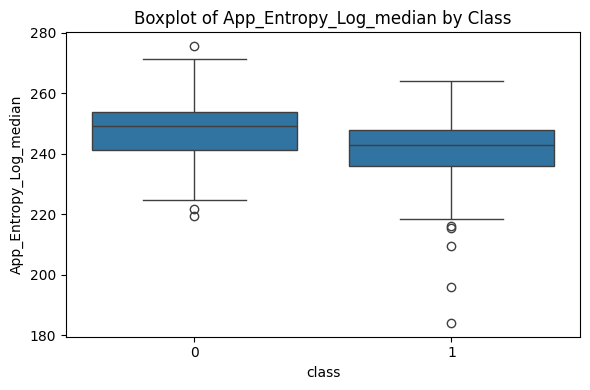

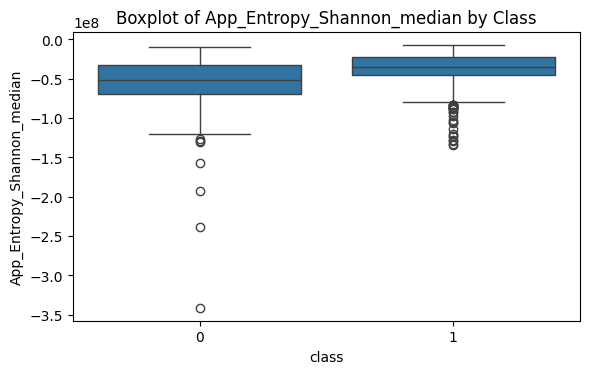

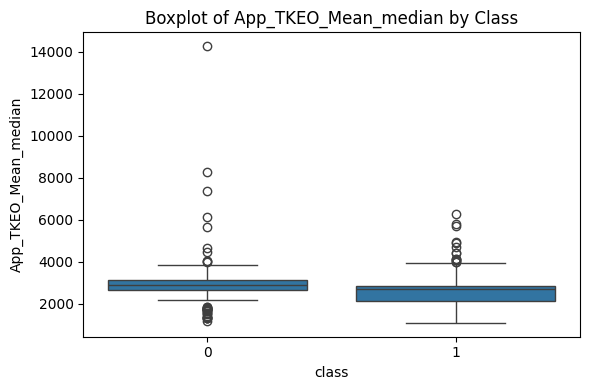

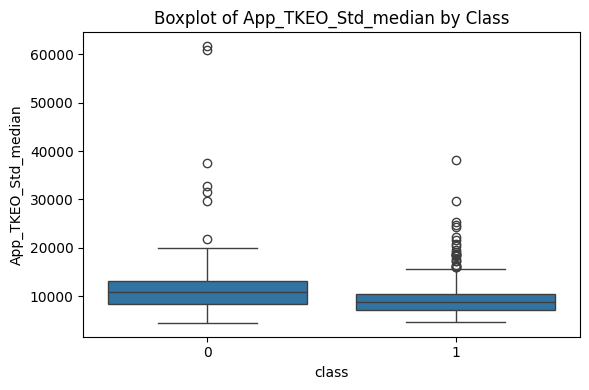

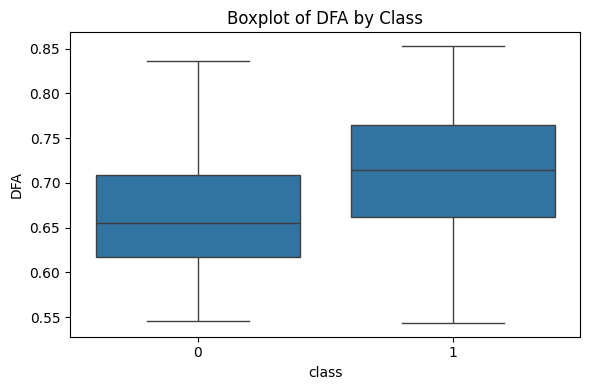

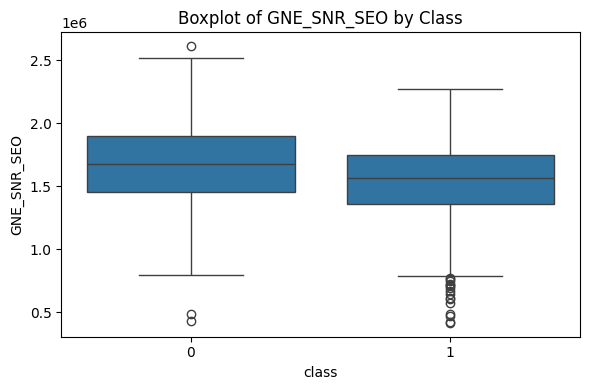

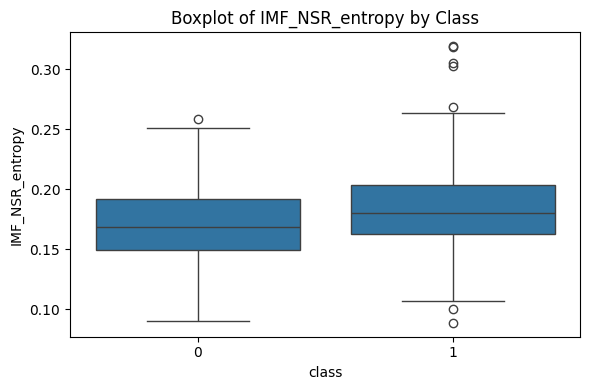

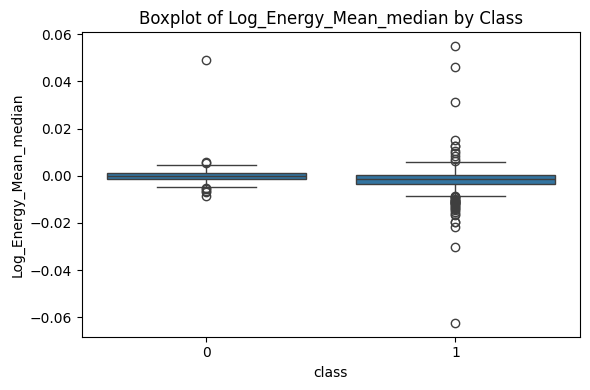

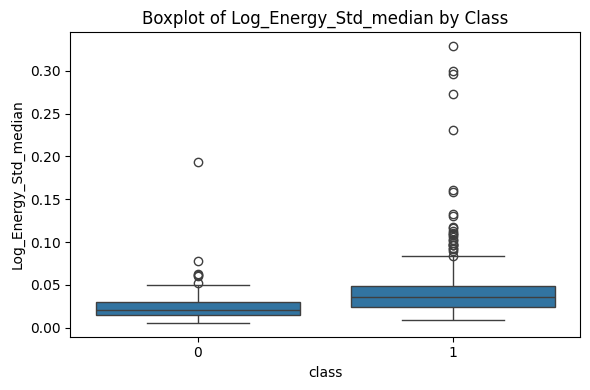

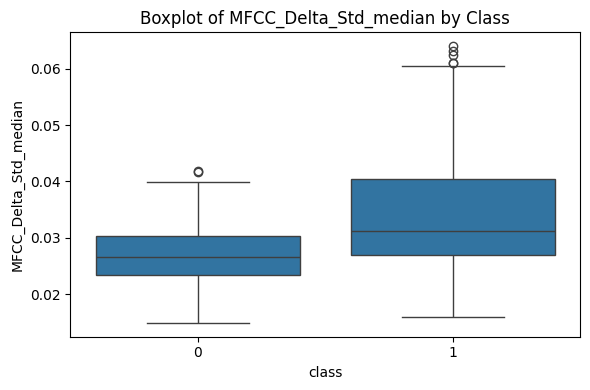

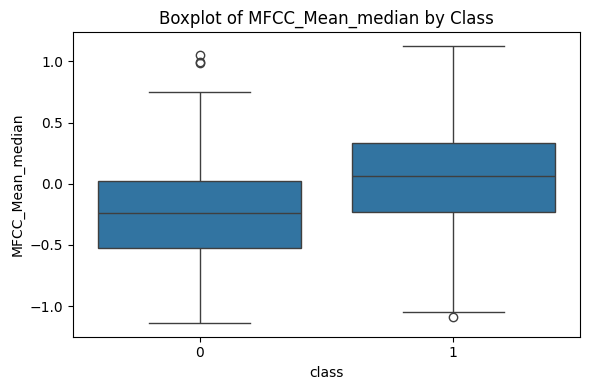

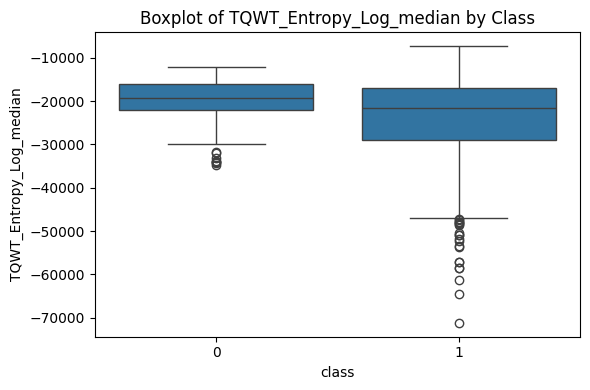

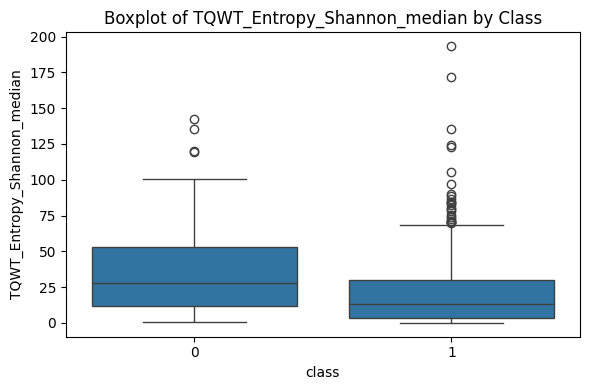

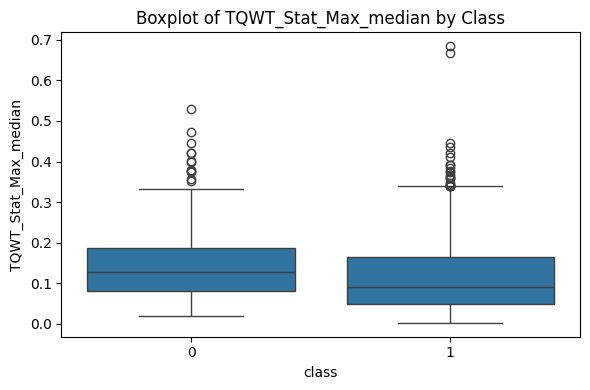

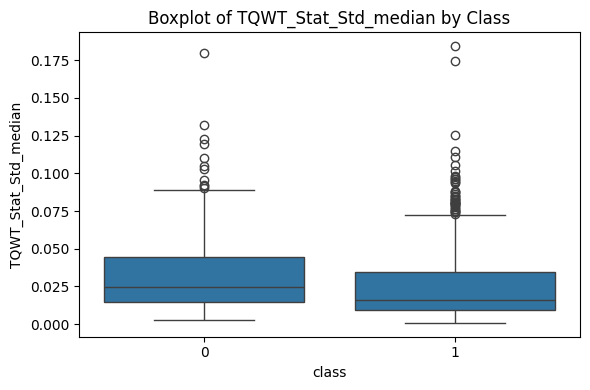

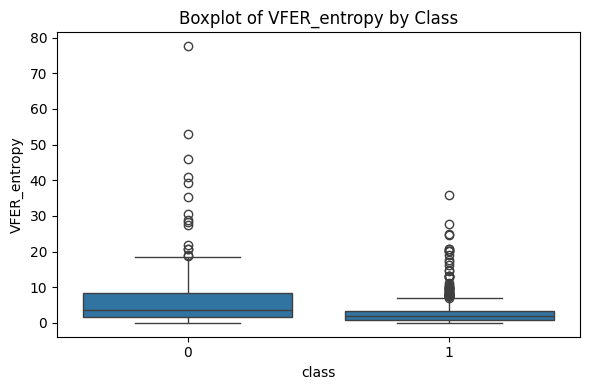

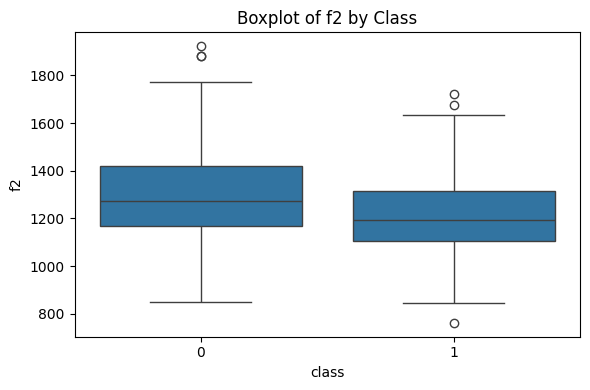

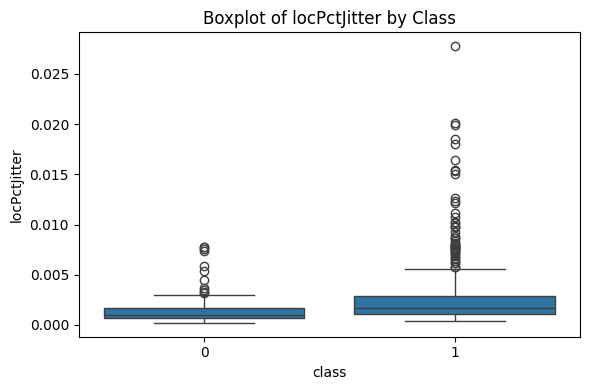

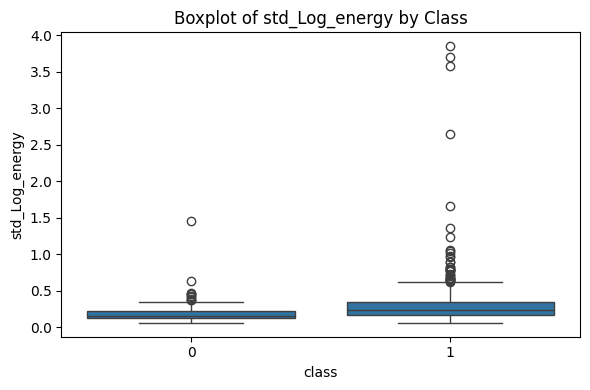

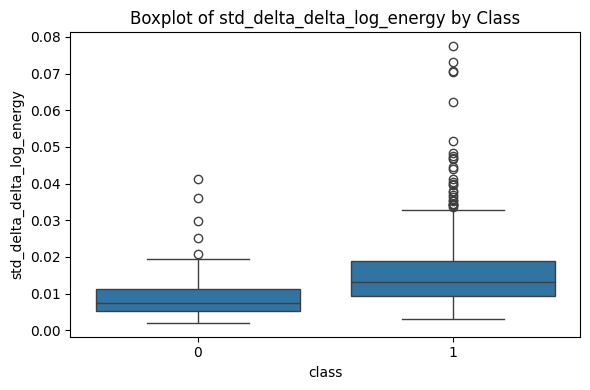

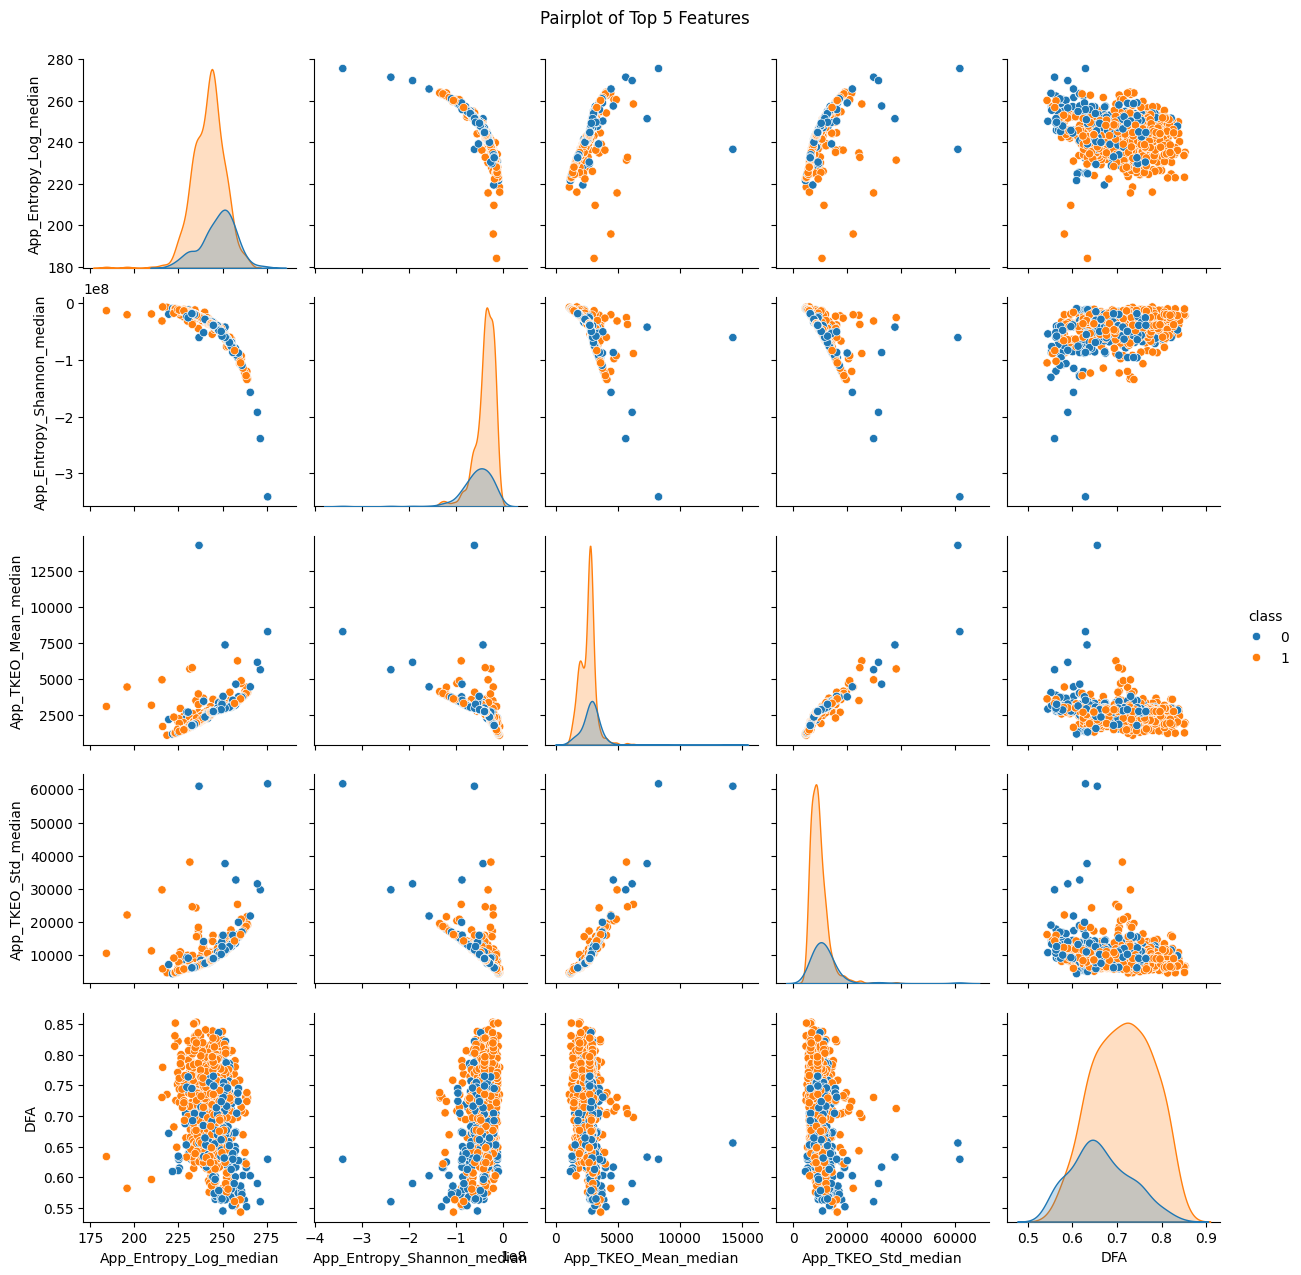

In [16]:
top_features_all_three = [
    'App_Entropy_Log_median', 'App_Entropy_Shannon_median', 'App_TKEO_Mean_median', 'App_TKEO_Std_median',
    'DFA', 'GNE_SNR_SEO', 'IMF_NSR_entropy', 'Log_Energy_Mean_median', 'Log_Energy_Std_median',
    'MFCC_Delta_Std_median', 'MFCC_Mean_median', 'TQWT_Entropy_Log_median', 'TQWT_Entropy_Shannon_median',
    'TQWT_Stat_Max_median', 'TQWT_Stat_Std_median', 'VFER_entropy', 'f2', 'locPctJitter',
    'std_Log_energy', 'std_delta_delta_log_energy'
]

run_custom_eda(df, top_features_all_three, class_column='class')


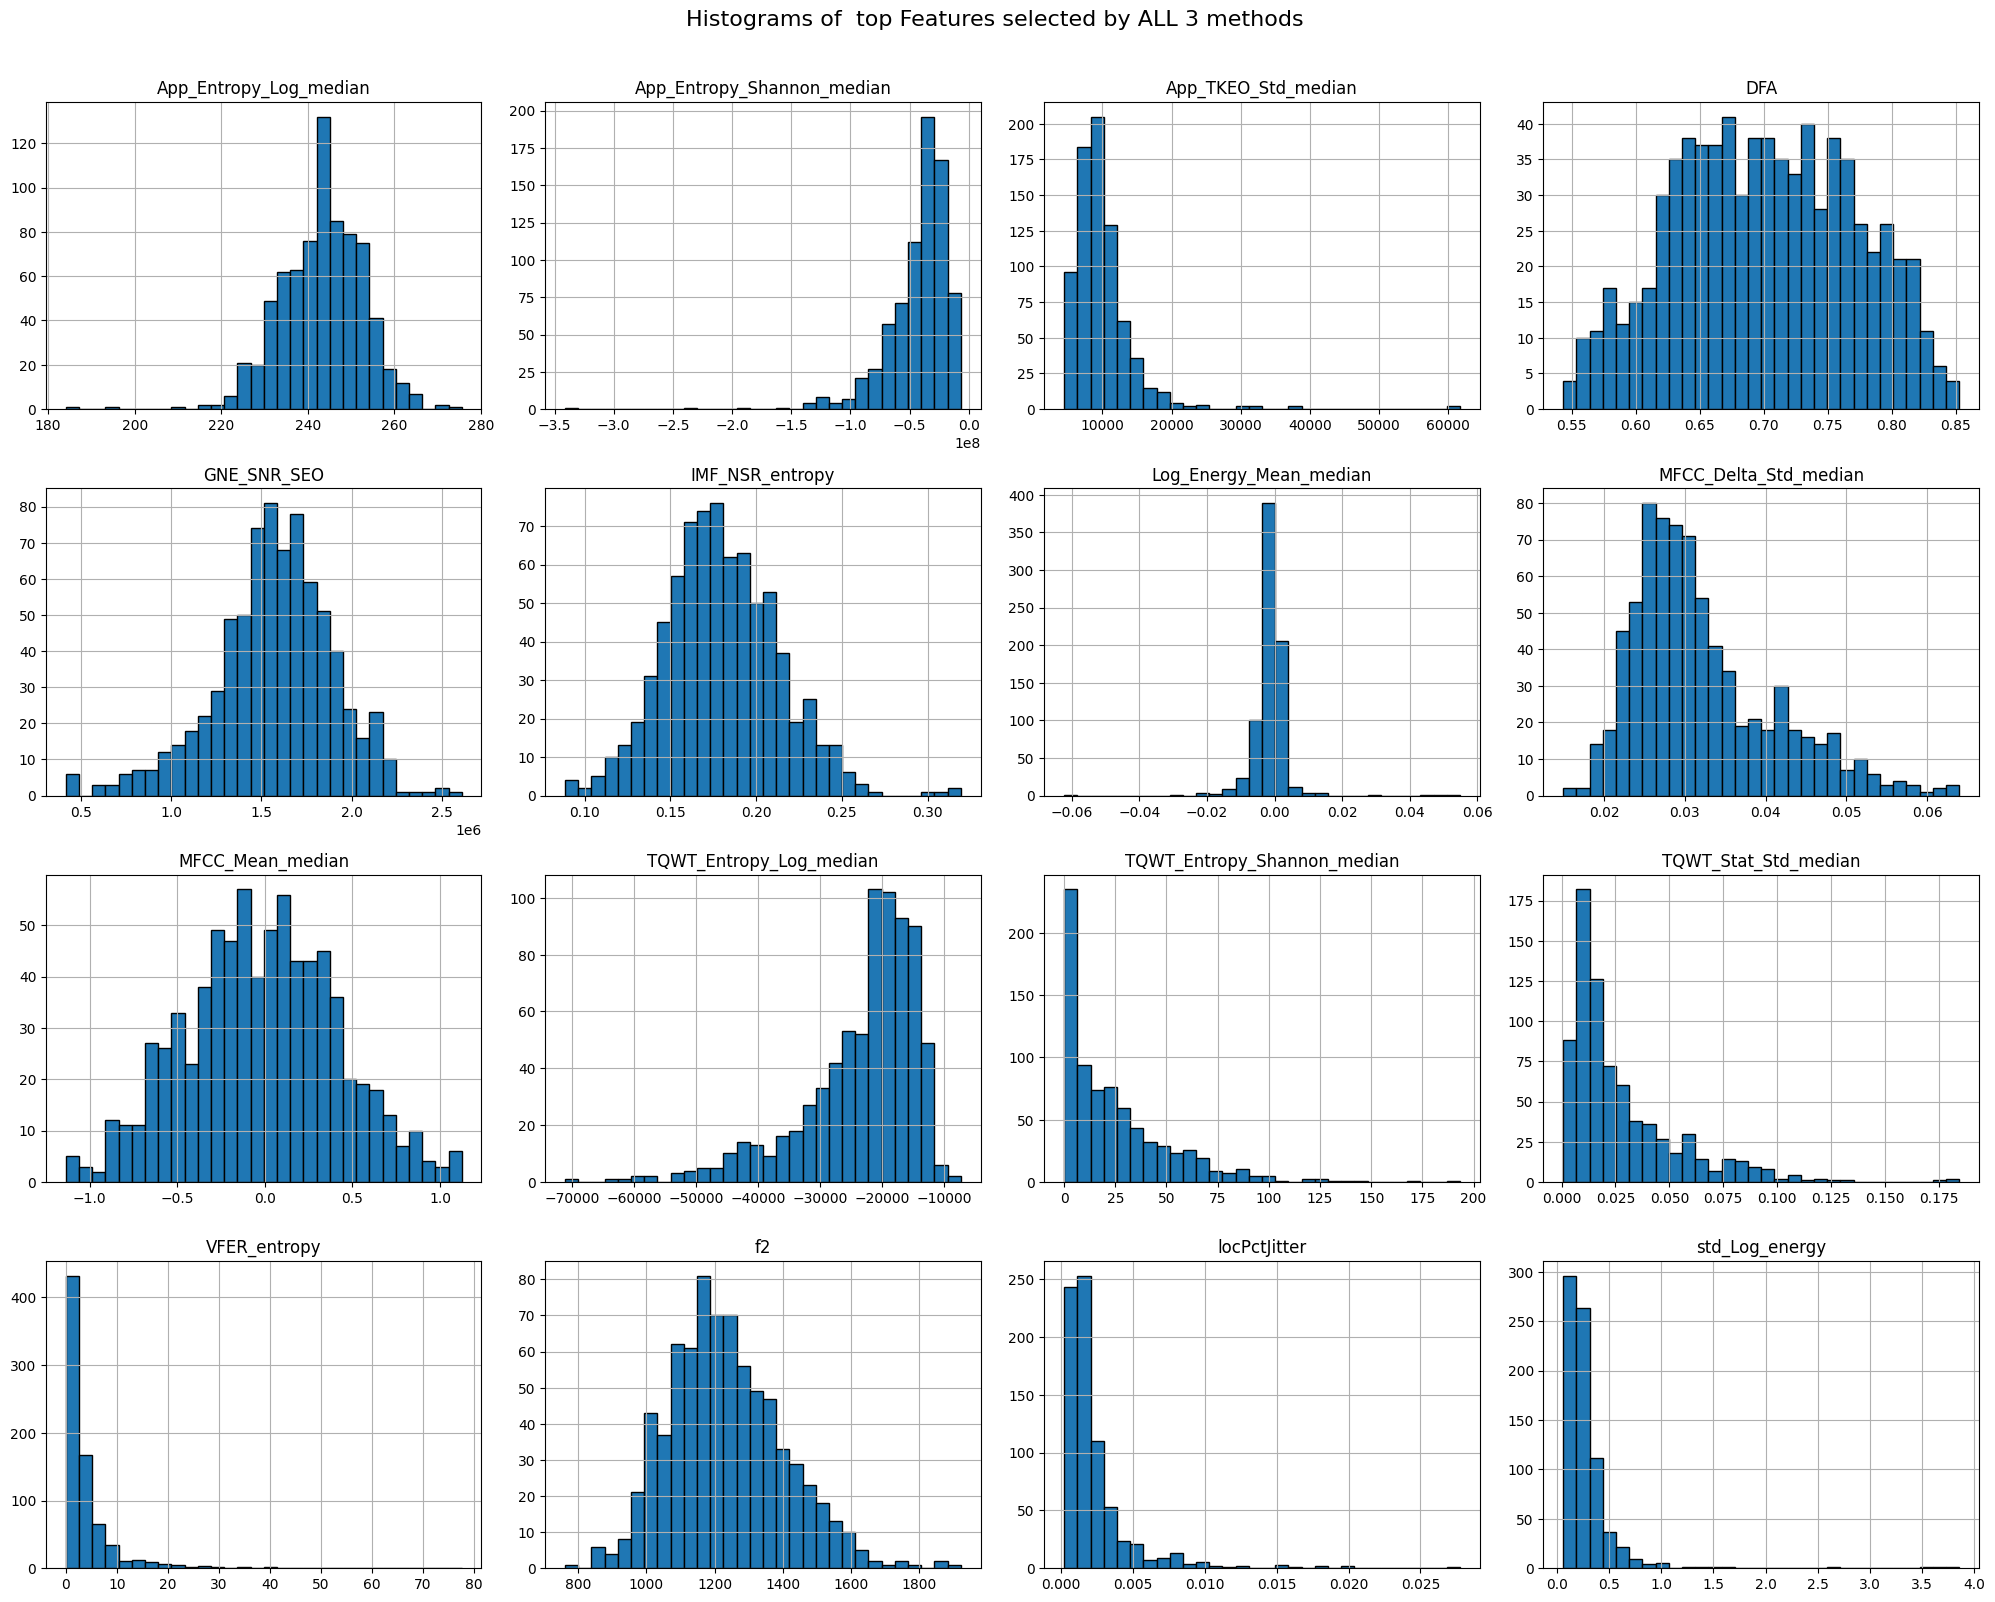

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the top selected features
selected_features = [
    'App_Entropy_Log_median', 'App_Entropy_Shannon_median',  'App_TKEO_Std_median',
    'DFA', 'GNE_SNR_SEO', 'IMF_NSR_entropy', 'Log_Energy_Mean_median',
    'MFCC_Delta_Std_median', 'MFCC_Mean_median', 'TQWT_Entropy_Log_median', 'TQWT_Entropy_Shannon_median',
    'TQWT_Stat_Std_median', 'VFER_entropy', 'f2', 'locPctJitter',
    'std_Log_energy', 
]

# Histogram of selected features
df[selected_features].hist(bins=30, figsize=(20, 20), layout=(5, 4), edgecolor='black')
plt.suptitle("Histograms of  top Features selected by ALL 3 methods", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

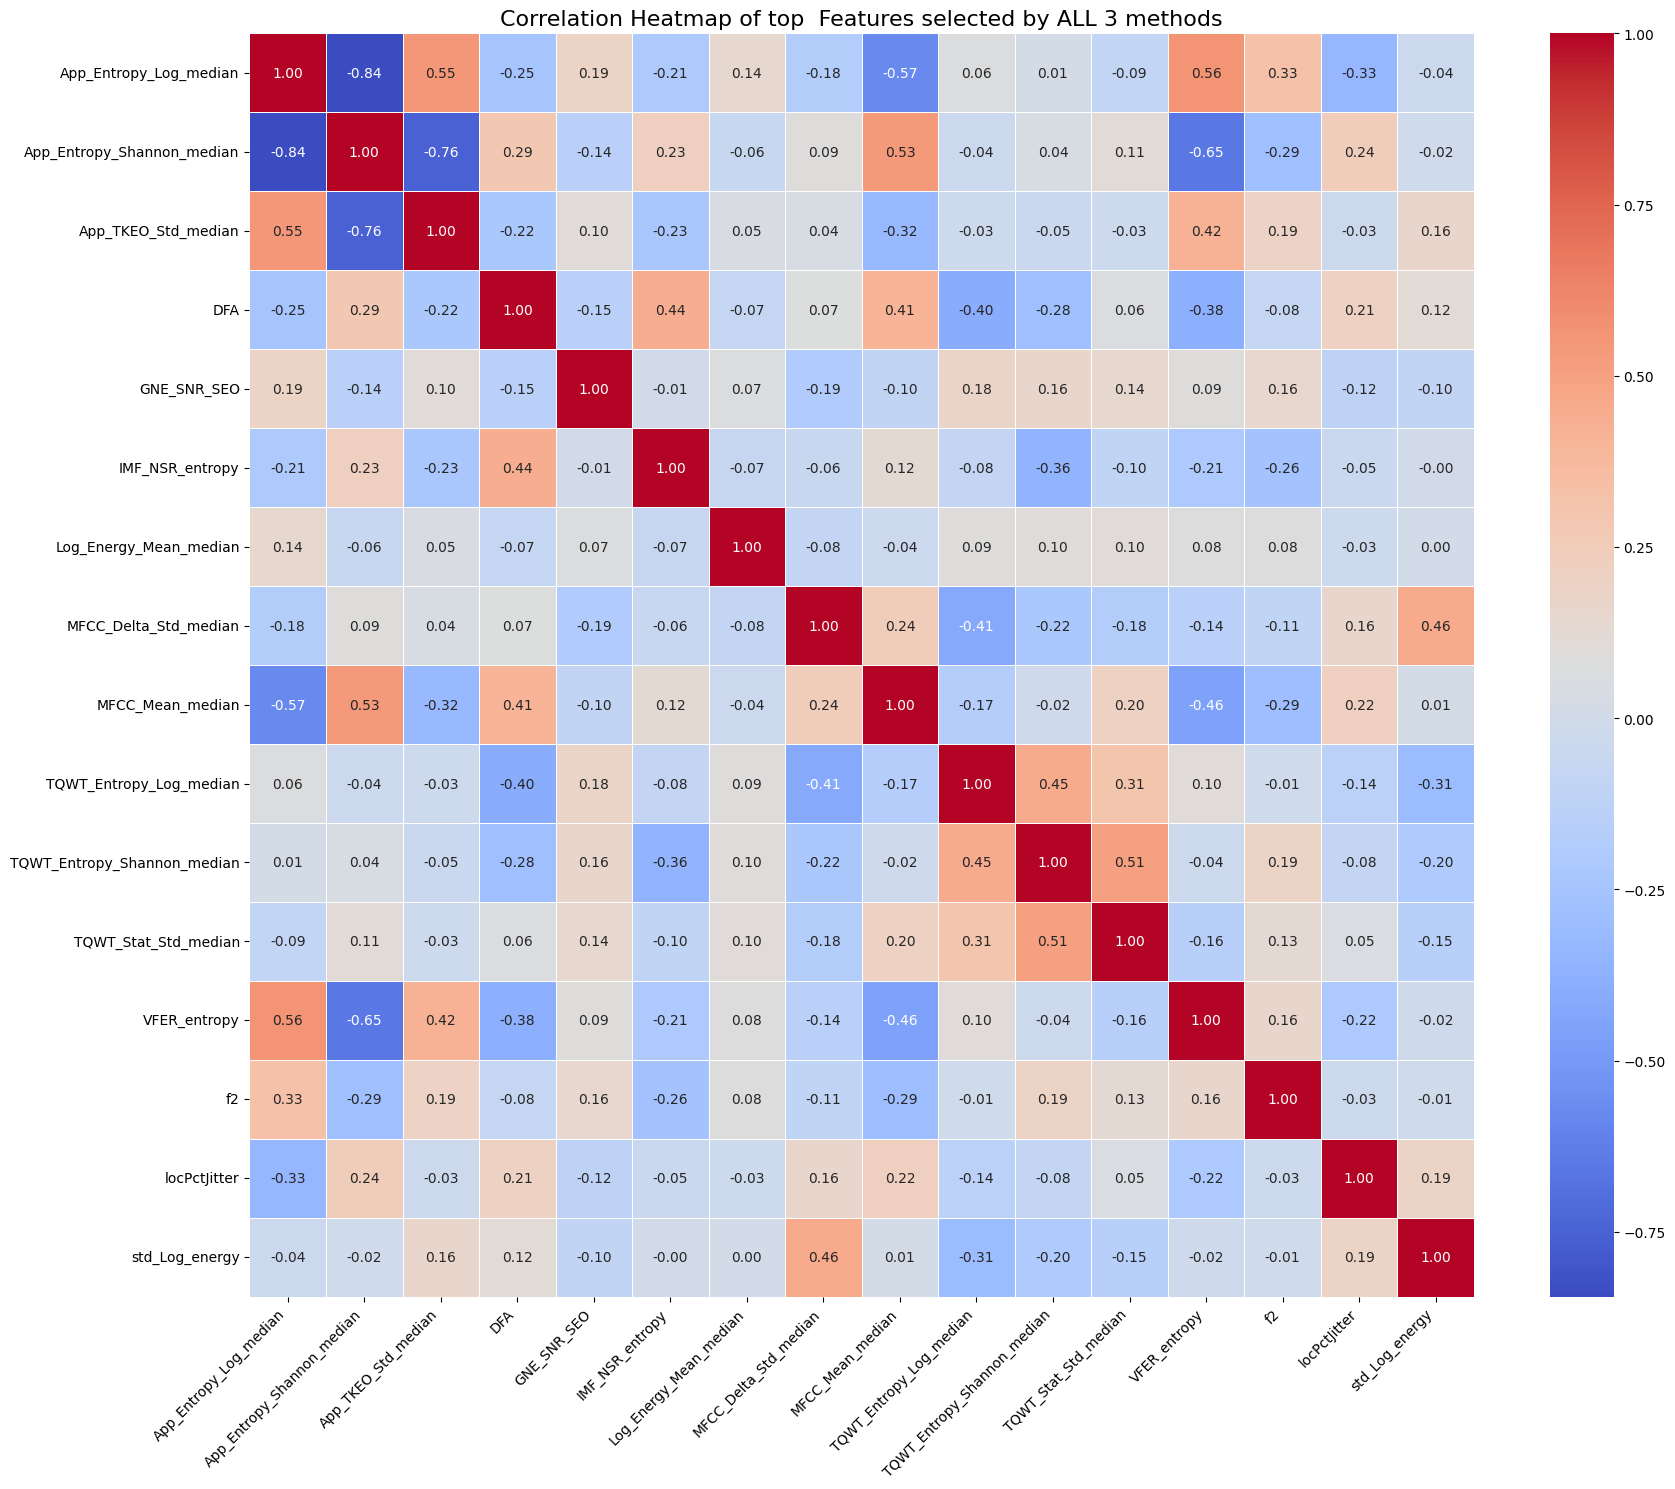

In [43]:
# Compute correlation matrix for selected features
correlation_matrix = df[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of top  Features selected by ALL 3 methods", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
#plt.show()
plt.savefig("Correlation Heatmap.png")

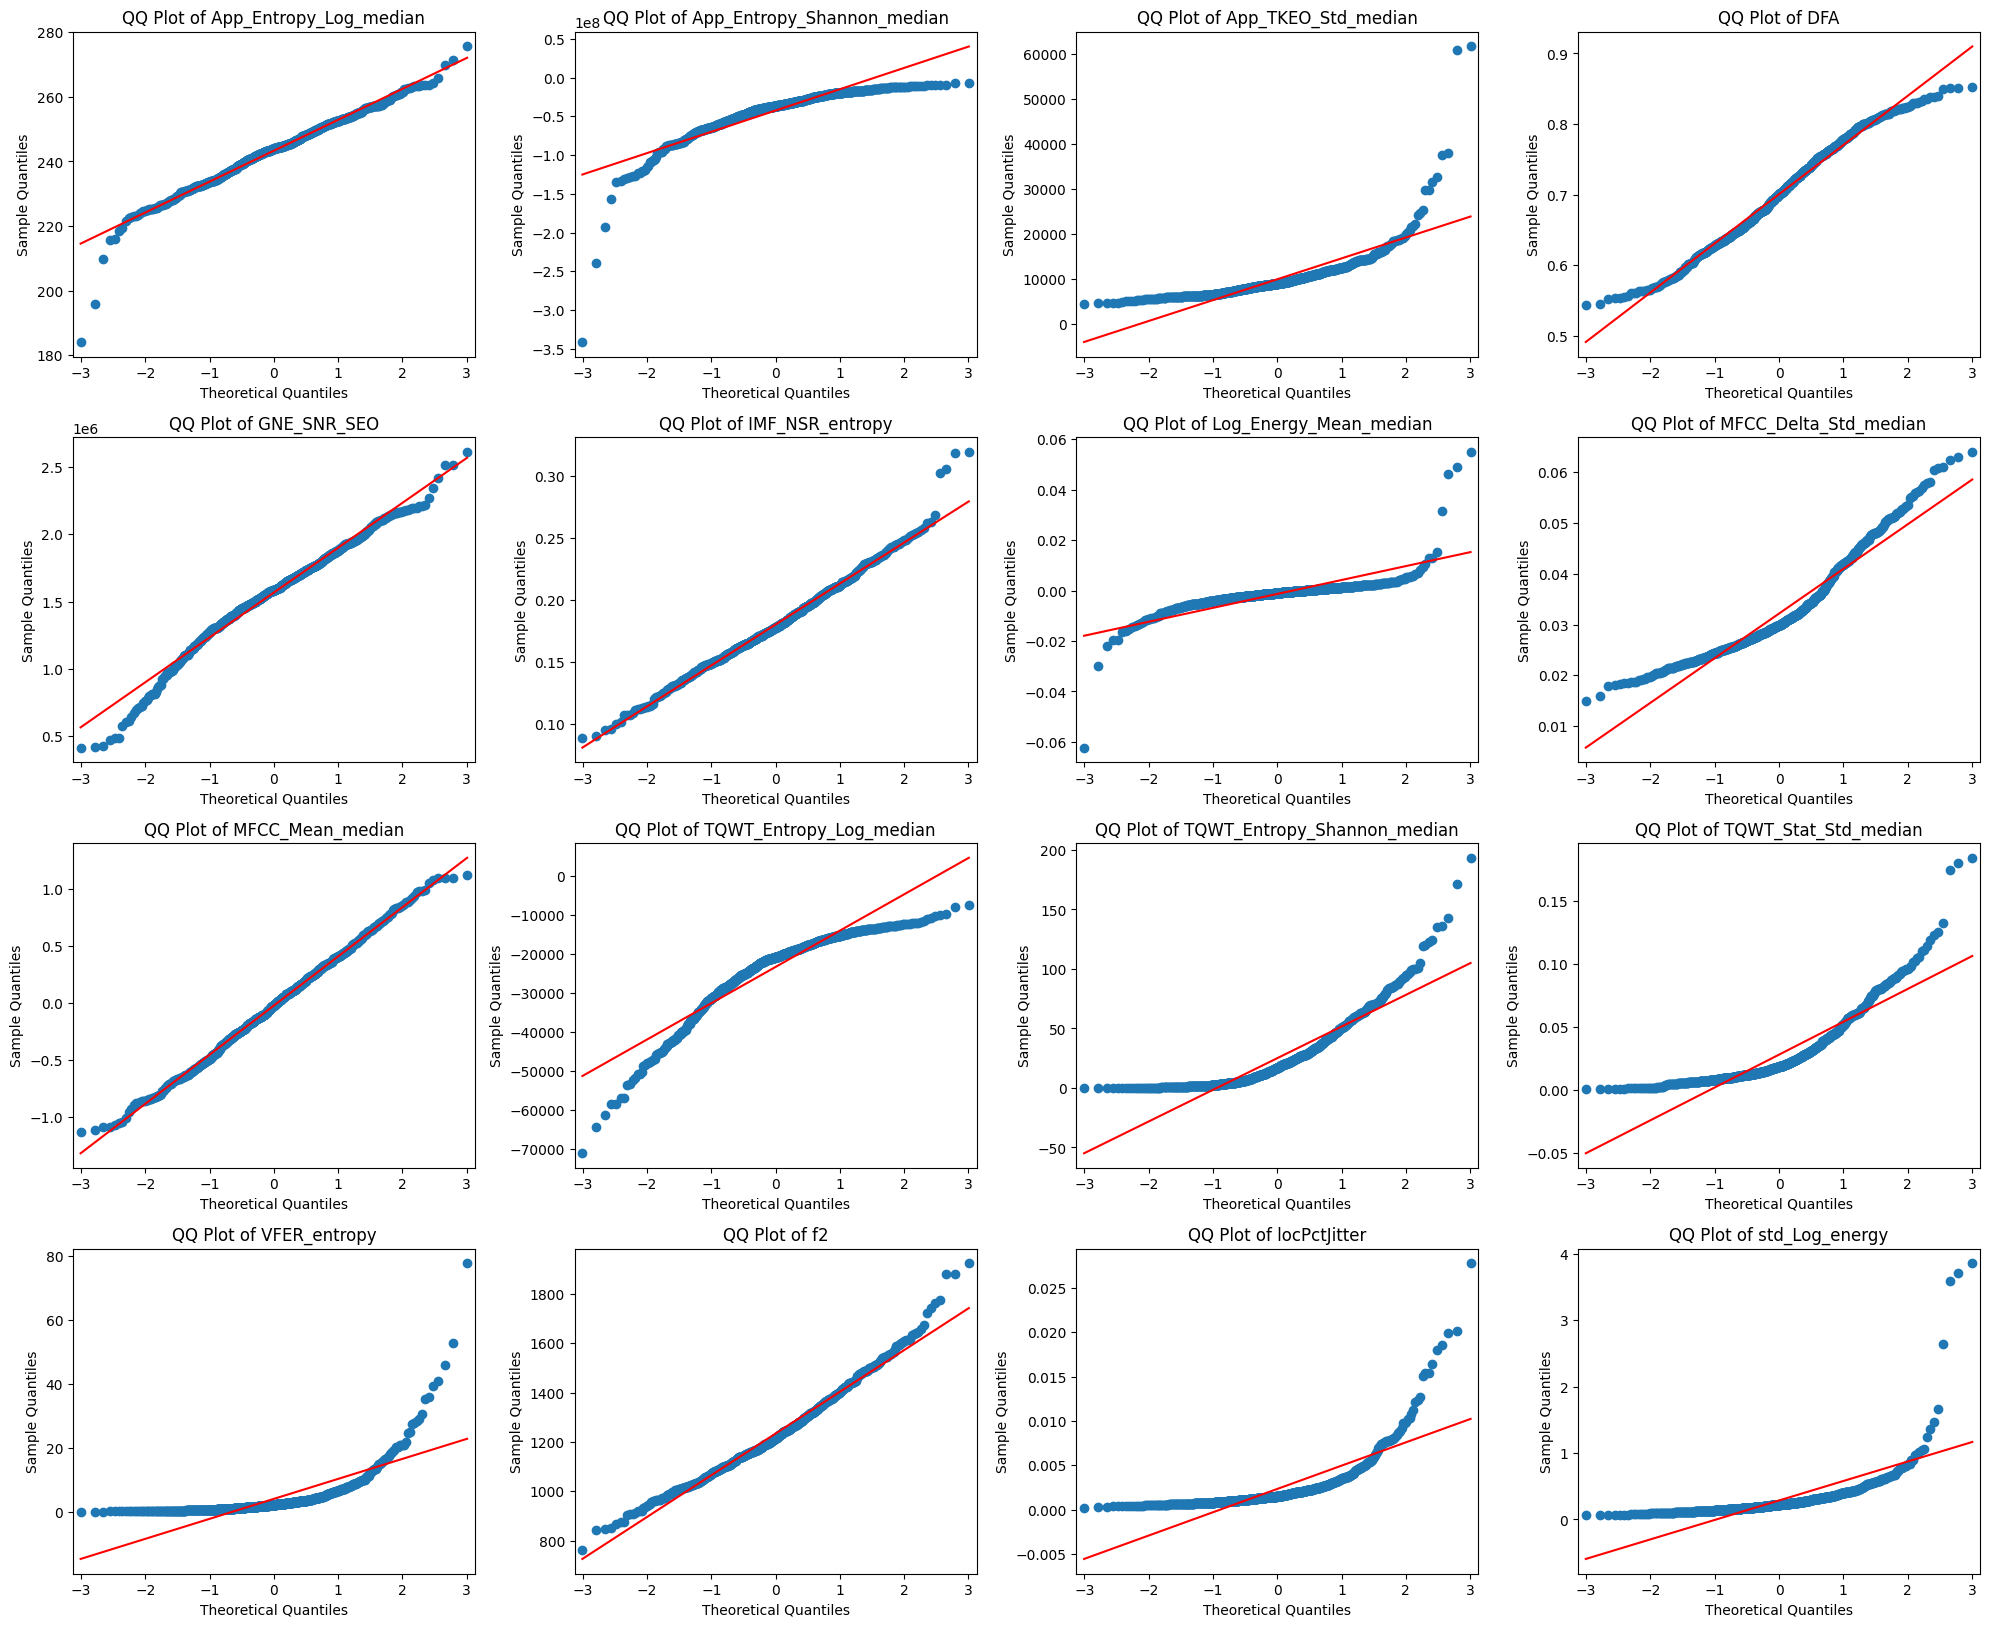

In [44]:
import statsmodels.api as sm

# QQ plots
plt.figure(figsize=(20, 4 * rows))
for i, feature in enumerate(selected_features):
    plt.subplot(rows, cols, i + 1)
    sm.qqplot(selected_df[feature].dropna(), line='s', ax=plt.gca())
    plt.title(f'QQ Plot of {feature}')
    plt.tight_layout()
#plt.show()
plt.savefig("QQ Plot.png")
